In [1]:
from astroquery.mast import Observations  #Used to download IMA files from the MAST HST archive
from astropy.io import fits #Used to open the files
import matplotlib.pyplot as plt #Used to plot the images
import numpy as np #Used for some math

%matplotlib notebook 

### Get the table of observations associated to GO-14114 (PI van Dokkum, the first proposal to use the DASH mode)

In [2]:
obsTable = Observations.query_criteria(proposal_id=['14114'],dataproduct_type="image",project='HST')

### Get the full list of products associated to the table and restric the list to IMA files

In [3]:
product_list = Observations.get_product_list(obsTable)
BM = (product_list['productSubGroupDescription']  == 'IMA') 

product_list = product_list[BM]


### Display (part of) the IMA files list

In [4]:
product_list.show_in_notebook(display_length=5)

idx,obsID,obs_collection,dataproduct_type,obs_id,description,type,dataURI,productType,productGroupDescription,productSubGroupDescription,productDocumentationURL,project,prvversion,proposal_id,productFilename,size,parent_obsid
0,2004677397,HST,image,icxe01tyq,DADS IMA file - Intermediate Mult-Accum WFC3/NICMOS,S,mast:HST/product/icxe01tyq_ima.fits,AUXILIARY,--,IMA,--,CALWF3,3.4(28-Sep-2016),14114,icxe01tyq_ima.fits,126201600,2004677844
1,2004677398,HST,image,icxe01u0q,DADS IMA file - Intermediate Mult-Accum WFC3/NICMOS,S,mast:HST/product/icxe01u0q_ima.fits,AUXILIARY,--,IMA,--,CALWF3,3.4(28-Sep-2016),14114,icxe01u0q_ima.fits,115686720,2004677844
2,2004677399,HST,image,icxe01u2q,DADS IMA file - Intermediate Mult-Accum WFC3/NICMOS,S,mast:HST/product/icxe01u2q_ima.fits,AUXILIARY,--,IMA,--,CALWF3,3.4(28-Sep-2016),14114,icxe01u2q_ima.fits,126201600,2004677844
3,2004677400,HST,image,icxe01u4q,DADS IMA file - Intermediate Mult-Accum WFC3/NICMOS,S,mast:HST/product/icxe01u4q_ima.fits,AUXILIARY,--,IMA,--,CALWF3,3.4(28-Sep-2016),14114,icxe01u4q_ima.fits,126201600,2004677844
4,2004677401,HST,image,icxe01u6q,DADS IMA file - Intermediate Mult-Accum WFC3/NICMOS,S,mast:HST/product/icxe01u6q_ima.fits,AUXILIARY,--,IMA,--,CALWF3,3.4(28-Sep-2016),14114,icxe01u6q_ima.fits,136716480,2004677844
5,2004677402,HST,image,icxe01u8q,DADS IMA file - Intermediate Mult-Accum WFC3/NICMOS,S,mast:HST/product/icxe01u8q_ima.fits,AUXILIARY,--,IMA,--,CALWF3,3.4(28-Sep-2016),14114,icxe01u8q_ima.fits,136716480,2004677844
6,2004677403,HST,image,icxe01uaq,DADS IMA file - Intermediate Mult-Accum WFC3/NICMOS,S,mast:HST/product/icxe01uaq_ima.fits,AUXILIARY,--,IMA,--,CALWF3,3.4(28-Sep-2016),14114,icxe01uaq_ima.fits,136716480,2004677844
7,2004677404,HST,image,icxe01ucq,DADS IMA file - Intermediate Mult-Accum WFC3/NICMOS,S,mast:HST/product/icxe01ucq_ima.fits,AUXILIARY,--,IMA,--,CALWF3,3.4(28-Sep-2016),14114,icxe01ucq_ima.fits,126201600,2004677844
8,2004677405,HST,image,icxe02bcs,DADS IMA file - Intermediate Mult-Accum WFC3/NICMOS,S,mast:HST/product/icxe02bcs_ima.fits,AUXILIARY,--,IMA,--,CALWF3,3.4(28-Sep-2016),14114,icxe02bcs_ima.fits,126201600,2004677845
9,2004677406,HST,image,icxe02bes,DADS IMA file - Intermediate Mult-Accum WFC3/NICMOS,S,mast:HST/product/icxe02bes_ima.fits,AUXILIARY,--,IMA,--,CALWF3,3.4(28-Sep-2016),14114,icxe02bes_ima.fits,115686720,2004677845


### Pick a single IMA file to work on, download it and display it

In [5]:
myID = product_list['obsID'][0:1]
download = Observations.download_products(myID,mrp_only=False,productSubGroupDescription=['IMA','DRZ'])

INFO: Found cached file ./mastDownload/HST/icxe01tyq/icxe01tyq_ima.fits with expected size 126201600. [astroquery.query]


In [6]:
localpathtofile = download['Local Path'][0]

In [7]:
original_ima = fits.open(localpathtofile)
original_ima.info()

Filename: ./mastDownload/HST/icxe01tyq/icxe01tyq_ima.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     260   ()      
  1  SCI           1 ImageHDU        81   (1024, 1024)   float32   
  2  ERR           1 ImageHDU        43   (1024, 1024)   float32   
  3  DQ            1 ImageHDU        35   (1024, 1024)   int16   
  4  SAMP          1 ImageHDU        30   ()      
  5  TIME          1 ImageHDU        30   ()      
  6  SCI           2 ImageHDU        81   (1024, 1024)   float32   
  7  ERR           2 ImageHDU        43   (1024, 1024)   float32   
  8  DQ            2 ImageHDU        35   (1024, 1024)   int16   
  9  SAMP          2 ImageHDU        30   ()      
 10  TIME          2 ImageHDU        30   ()      
 11  SCI           3 ImageHDU        81   (1024, 1024)   float32   
 12  ERR           3 ImageHDU        43   (1024, 1024)   float32   
 13  DQ            3 ImageHDU        35   (1024, 1024)   int16   
 14  SAMP          

NSAMP 12


<IPython.core.display.Javascript object>


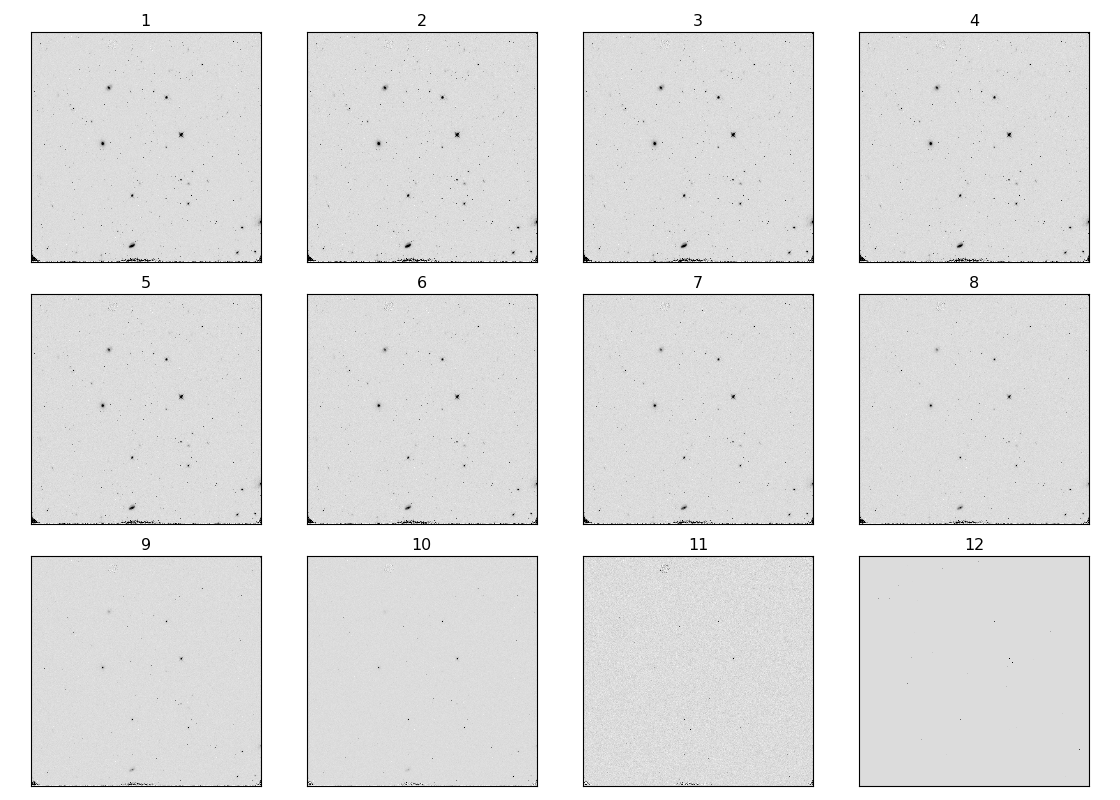

2 3 12
2 2 11
2 1 10
2 0 9
1 3 8
1 2 7
1 1 6
1 0 5
0 3 4
0 2 3
0 1 2
0 0 1


In [8]:
nsamp = original_ima[0].header['NSAMP']
print('NSAMP',nsamp)
fig,axarr = plt.subplots(nsamp//4,4, figsize=(14,10))

for i in range(nsamp,0,-1):
    row = (i-1)//4
    col = (i-1)%4
    print(row,col,i)
    immed = np.nanmedian(original_ima['SCI',i].data)
    stdev = np.nanstd(original_ima['SCI',i].data)
    axarr[row,col].imshow(original_ima['SCI',i].data,clim=[immed-.3*stdev,immed+1.*stdev],cmap='Greys')
    axarr[row,col].set_title(str(i))
    axarr[row,col].set_xticks([]) 
    axarr[row,col].set_yticks([]) 
    
fig.tight_layout()